<a href="https://colab.research.google.com/github/BrianJett/Gold-Standard-Pipeline-Guide/blob/main/Machine_Learning_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
 24418621-565E-416E-9DA5-8E4527734A5E.jpeg
'ACFrOgA124Y9G0XhSnN7s60eLSm8vmkFU_O1xKogsskN9EwY24wxqd3VT06vARi8P-ga8cu0ikclvlnWsLEMDn56-D-3NZKhv3ONgEKqWGBo0YVymmNFInfF1V5Tln0=.pdf'
'B Jett passport 2023.pdf'
 Brian_Jett.jpg
 Brian_Jett_PGN_Application.pdf
'Call with Ben Mark .gdoc'
'Case Arguments.gdoc'
 CBA0B83F-965E-4C11-9B81-1E0D7E2ECA67.jpeg
'CMN 111 Intro .gdoc'
'Colab Notebooks'
'Copy of 4 Stress Test for Teens.doc.gdoc'
'Copy of chain of infection worksheet.gdoc'
'Copy of Health Behavior Contract 2018 EXERCISE.gdoc'
'Copy of Health Behavior Contract 2018 NUTRITION.gdoc'
'Copy of Health Behavior Contract 2018 SLEEP.gdoc'
'Copy of Health Behavior Contract week 1.gdoc'
'Copy of Health Behavior Contract Week 2.gdoc'
'Copy of How to live to be 100+.gdoc'
'Copy of Me Tree.gslides'
'Copy of Neglected Heart Parts 123 OL2014.docx.gdoc'
'Copy of Opening Health Paper NV.gdoc'
'Copy of Post-Test Food Diary FALL 2016 .gdoc'
'Copy of Recruit Information Sheet.gdoc'
'Cop

For this week's investigation into gene-trait pairs and conditions, I want to investigate the relationship between the KRAS gene and lung cancer when accounting for age. Furthermore, I would also like to investigate the relationship between the TP53 gene and liver cancer when accounting for height. Lastly, I want to determine the relationship between the CDH1 gene and stomach cancer when accounting for age

In [3]:
lung_clinical_data = pd.read_csv('TCGA/TCGA_Lung_Cancer_(LUNG)/TCGA.LUNG.sampleMap_LUNG_clinicalMatrix', sep='\t', index_col=0)
lung_gene_data = pd.read_csv('TCGA/TCGA_Lung_Cancer_(LUNG)/TCGA.LUNG.sampleMap_HiSeqV2_PANCAN.gz',  sep='\t', index_col=0)
liver_clinical_data = pd.read_csv('TCGA/TCGA_Liver_Cancer_(LIHC)/TCGA.LIHC.sampleMap_LIHC_clinicalMatrix', sep='\t', index_col=0)
liver_gene_data = pd.read_csv('TCGA/TCGA_Liver_Cancer_(LIHC)/TCGA.LIHC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)
stomach_clinical_data = pd.read_csv('TCGA/TCGA_Stomach_Cancer_(STAD)/TCGA.STAD.sampleMap_STAD_clinicalMatrix', sep='\t', index_col=0)
stomach_gene_data = pd.read_csv('TCGA/TCGA_Stomach_Cancer_(STAD)/TCGA.STAD.sampleMap_HiSeqV2_PANCAN.gz',  sep='\t', index_col=0)


In [20]:
liver_gene_fullname = 'TP53'
liver_gene = 'tp53'
liver_condition = 'height'
liver_condition_col = 'height'
liver_trait = 'Liver Cancer'

In [21]:
lung_gene_fullname = 'KRAS'
lung_gene = 'kras'
lung_condition = 'age'
lung_condition_col = 'days_to_birth'
lung_trait = 'Lung Cancer'

In [22]:
stomach_gene_fullname = 'CDH1'
stomach_gene = 'cdh1'
stomach_condition = 'age'
stomach_condition_col = 'days_to_birth'
stomach_trait = 'Stomach Cancer'

In [37]:
liver_col_offset = len(liver_clinical_data.columns)
num_genes = len(liver_gene_data)
print(f'The clinical dataset has {liver_col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 109 features, and the gene dataset includes 20530 genes


In [38]:
lung_col_offset = len(lung_clinical_data.columns)
num_genes = len(lung_gene_data)
print(f'The clinical dataset has {lung_col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 133 features, and the gene dataset includes 20530 genes


In [39]:
stomach_col_offset = len(stomach_clinical_data.columns)
num_genes = len(stomach_gene_data)
print(f'The clinical dataset has {stomach_col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 107 features, and the gene dataset includes 20530 genes


In [40]:
liver_merged_data = liver_clinical_data.join(liver_gene_data.T)
liver_merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,58.0,3.5,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,51.0,3.5,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,55.0,3.5,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [41]:
lung_merged_data = lung_clinical_data.join(lung_gene_data.T, lsuffix='_clinical', rsuffix='_gene')
lung_merged_data.head()

,ABSOLUTE_Ploidy,ABSOLUTE_Purity,AKT1_clinical,ALK_translocation,BRAF_clinical,CBL_clinical,CTNNB1_clinical,Canonical_mut_in_KRAS_EGFR_ALK,Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2,EGFR_clinical,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.015022,-1.155117,0.528367,2.75061,0.428423,-0.639586,-0.195527,-0.324695,0.193167,-0.572812
TCGA-05-4249-01,3.77,0.46,none,NaN,p.A762E,none,none,Y,Y,none,...,-0.031778,-0.393117,1.632467,2.33551,-0.145577,-0.997486,-0.276027,-1.219395,1.850967,-0.471212
TCGA-05-4250-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-1.173917,1.966367,-1.28139,-0.374877,0.959514,0.714373,0.112305,-0.532833,-0.003812
TCGA-05-4382-01,NaN,NaN,none,NaN,p.L613F,none,none,N,N,"p.R222L, p.E545Q",...,1.013722,-1.587117,0.359267,2.59051,0.806623,0.812114,0.367373,-0.494595,-1.062233,0.108588
TCGA-05-4384-01,2.04,0.48,none,NaN,none,none,p.F777S,N,N,none,...,-0.060978,-0.435417,1.111467,-1.28139,-0.128477,0.110214,1.469373,0.194605,1.404667,-0.290712


In [42]:
stomach_merged_data = stomach_clinical_data.join(stomach_gene_data.T)
stomach_merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,additional_surgery_metastatic_procedure,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,MSS,TCGA-3M-AB46-01,TCGA-3M-AB46,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,0.213122,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512
TCGA-3M-AB47-01,MSI-L,TCGA-3M-AB47-01,TCGA-3M-AB47,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NO,NO,NO,NaN,...,-0.254978,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988
TCGA-B7-5816-01,MSI-H,TCGA-B7-5816-01,TCGA-B7-5816,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612
TCGA-B7-5818-01,MSI-L,TCGA-B7-5818-01,TCGA-B7-5818,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,0.818922,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312
TCGA-B7-A5TI-01,MSI-H,TCGA-B7-A5TI-01,TCGA-B7-A5TI,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812


In [44]:
lung_input_cols = [lung_condition_col] + lung_merged_data.columns[lung_col_offset: lung_col_offset + num_genes].tolist()
lung_merged_data = lung_merged_data[lung_input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(lung_merged_data)
rows_after_any = len(lung_merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    lung_merged_data = lung_merged_data.dropna(how='any')
else:
    lung_merged_data = lung_merged_data.dropna(how='all')
    lung_merged_data = lung_merged_data.fillna(0)

lung_merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-25752.0,-0.056592,2.128674,-0.531035,-0.185972,-0.190878,-0.11891,-0.659794,-1.204246,0.008601,...,0.015022,-1.155117,0.528367,2.75061,0.428423,-0.639586,-0.195527,-0.324695,0.193167,-0.572812
TCGA-05-4249-01,-24532.0,-0.569692,-0.318126,-0.531035,0.237428,0.011822,-0.00611,1.018406,0.313854,-0.423399,...,-0.031778,-0.393117,1.632467,2.33551,-0.145577,-0.997486,-0.276027,-1.219395,1.850967,-0.471212
TCGA-05-4250-01,-29068.0,-0.899992,-0.918126,-0.531035,-0.621472,-0.454178,0.58719,-0.198894,-1.153846,-0.423399,...,-0.748878,-1.173917,1.966367,-1.28139,-0.374877,0.959514,0.714373,0.112305,-0.532833,-0.003812
TCGA-05-4382-01,-24868.0,0.667508,3.895974,-0.221535,-0.367272,0.131822,0.97629,-0.494994,1.059554,0.357201,...,1.013722,-1.587117,0.359267,2.59051,0.806623,0.812114,0.367373,-0.494595,-1.062233,0.108588
TCGA-05-4384-01,-24411.0,-0.316892,2.380374,0.156865,0.232828,0.054822,0.27059,0.128606,0.440354,-0.423399,...,-0.060978,-0.435417,1.111467,-1.28139,-0.128477,0.110214,1.469373,0.194605,1.404667,-0.290712


In [45]:
liver_input_cols = [liver_condition_col] + liver_merged_data.columns[liver_col_offset: liver_col_offset + num_genes].tolist()
liver_merged_data = liver_merged_data[liver_input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(liver_merged_data)
rows_after_any = len(liver_merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    liver_merged_data = liver_merged_data.dropna(how='any')
else:
    liver_merged_data = liver_merged_data.dropna(how='all')
    liver_merged_data = liver_merged_data.fillna(0)

liver_merged_data.head()

,height,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,173.0,1.437408,-3.259226,0.192865,0.251828,-0.695978,-0.14431,-1.048994,-1.627446,-0.423399,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,162.0,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,182.0,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,154.0,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,167.0,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [46]:
stomach_input_cols = [stomach_condition_col] + stomach_merged_data.columns[stomach_col_offset: stomach_col_offset + num_genes].tolist()
stomach_merged_data = stomach_merged_data[stomach_input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(stomach_merged_data)
rows_after_any = len(stomach_merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    stomach_merged_data = stomach_merged_data.dropna(how='any')
else:
    stomach_merged_data = stomach_merged_data.dropna(how='all')
    stomach_merged_data = stomach_merged_data.fillna(0)

stomach_merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,0.0,2.168708,-0.956226,-0.531035,0.135928,0.349322,0.14139,-0.419494,0.617054,2.509401,...,0.213122,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512
TCGA-3M-AB47-01,0.0,1.309708,1.160674,-0.037135,0.210328,0.313322,-0.28301,-0.415794,1.218654,1.524101,...,-0.254978,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988
TCGA-B7-5816-01,-18698.0,-0.045892,-2.968626,-0.531035,-0.206872,-0.105678,0.15469,-0.937094,1.262254,-0.423399,...,-0.748878,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612
TCGA-B7-5818-01,-22792.0,0.076608,5.843574,-0.531035,-0.190272,-0.647478,-0.02321,-0.576694,-1.346446,-0.423399,...,0.818922,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312
TCGA-B7-A5TI-01,-19014.0,0.046908,5.233774,-0.531035,-0.108772,-0.233578,0.21699,-1.040094,1.087354,-0.423399,...,-0.748878,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812


In [47]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

In [48]:
lung_merged_data[lung_trait] = lung_merged_data.index.to_series().apply(mark_tumor)

lung_merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Lung Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-25752.0,-0.056592,2.128674,-0.531035,-0.185972,-0.190878,-0.11891,-0.659794,-1.204246,0.008601,...,-1.155117,0.528367,2.75061,0.428423,-0.639586,-0.195527,-0.324695,0.193167,-0.572812,1
TCGA-05-4249-01,-24532.0,-0.569692,-0.318126,-0.531035,0.237428,0.011822,-0.00611,1.018406,0.313854,-0.423399,...,-0.393117,1.632467,2.33551,-0.145577,-0.997486,-0.276027,-1.219395,1.850967,-0.471212,1
TCGA-05-4250-01,-29068.0,-0.899992,-0.918126,-0.531035,-0.621472,-0.454178,0.58719,-0.198894,-1.153846,-0.423399,...,-1.173917,1.966367,-1.28139,-0.374877,0.959514,0.714373,0.112305,-0.532833,-0.003812,1
TCGA-05-4382-01,-24868.0,0.667508,3.895974,-0.221535,-0.367272,0.131822,0.97629,-0.494994,1.059554,0.357201,...,-1.587117,0.359267,2.59051,0.806623,0.812114,0.367373,-0.494595,-1.062233,0.108588,1
TCGA-05-4384-01,-24411.0,-0.316892,2.380374,0.156865,0.232828,0.054822,0.27059,0.128606,0.440354,-0.423399,...,-0.435417,1.111467,-1.28139,-0.128477,0.110214,1.469373,0.194605,1.404667,-0.290712,1


In [49]:
liver_merged_data[liver_trait] = liver_merged_data.index.to_series().apply(mark_tumor)

liver_merged_data.head()

,height,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,173.0,1.437408,-3.259226,0.192865,0.251828,-0.695978,-0.14431,-1.048994,-1.627446,-0.423399,...,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088,1
TCGA-2Y-A9GS-01,162.0,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,182.0,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,154.0,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,167.0,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1


In [50]:
stomach_merged_data[stomach_trait] = stomach_merged_data.index.to_series().apply(mark_tumor)

stomach_merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Stomach Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,0.0,2.168708,-0.956226,-0.531035,0.135928,0.349322,0.14139,-0.419494,0.617054,2.509401,...,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512,1
TCGA-3M-AB47-01,0.0,1.309708,1.160674,-0.037135,0.210328,0.313322,-0.28301,-0.415794,1.218654,1.524101,...,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988,1
TCGA-B7-5816-01,-18698.0,-0.045892,-2.968626,-0.531035,-0.206872,-0.105678,0.15469,-0.937094,1.262254,-0.423399,...,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612,1
TCGA-B7-5818-01,-22792.0,0.076608,5.843574,-0.531035,-0.190272,-0.647478,-0.02321,-0.576694,-1.346446,-0.423399,...,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312,1
TCGA-B7-A5TI-01,-19014.0,0.046908,5.233774,-0.531035,-0.108772,-0.233578,0.21699,-1.040094,1.087354,-0.423399,...,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812,1


In [51]:
liver_input_cols = liver_merged_data.columns.tolist()
liver_gene_list = [col for col in liver_input_cols if liver_gene in col.lower()]

In [52]:
lung_input_cols = lung_merged_data.columns.tolist()
lung_gene_list = [col for col in lung_input_cols if lung_gene in col.lower()]

In [53]:
stomach_input_cols = stomach_merged_data.columns.tolist()
stomach_gene_list = [col for col in stomach_input_cols if stomach_gene in col.lower()]

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

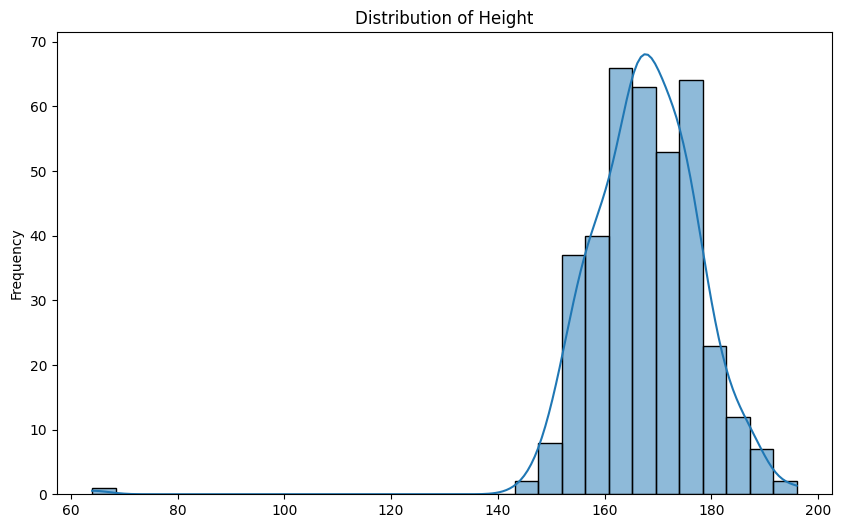

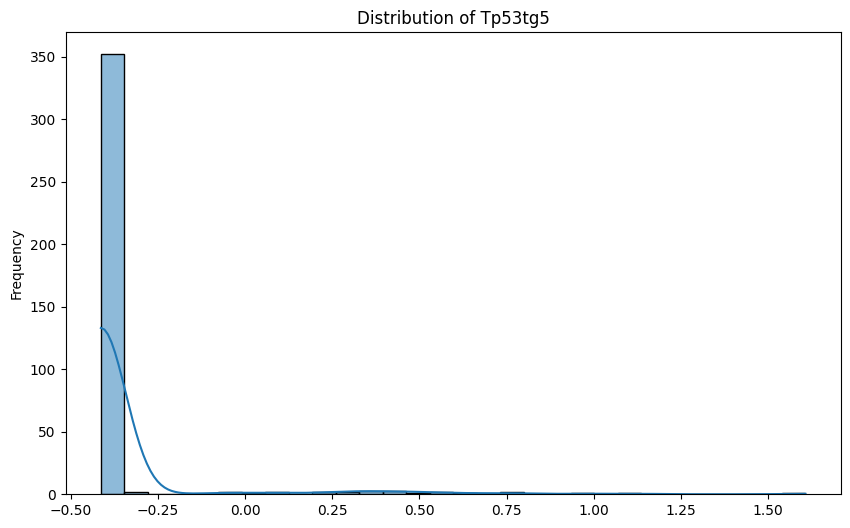

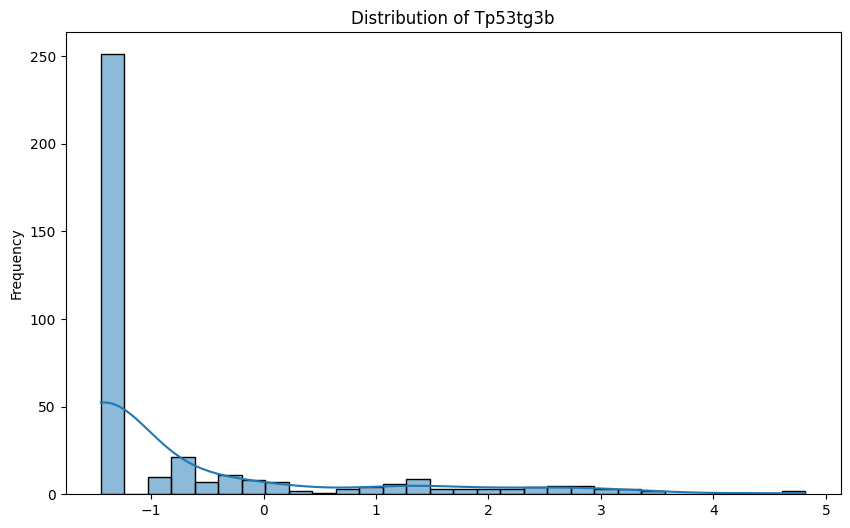

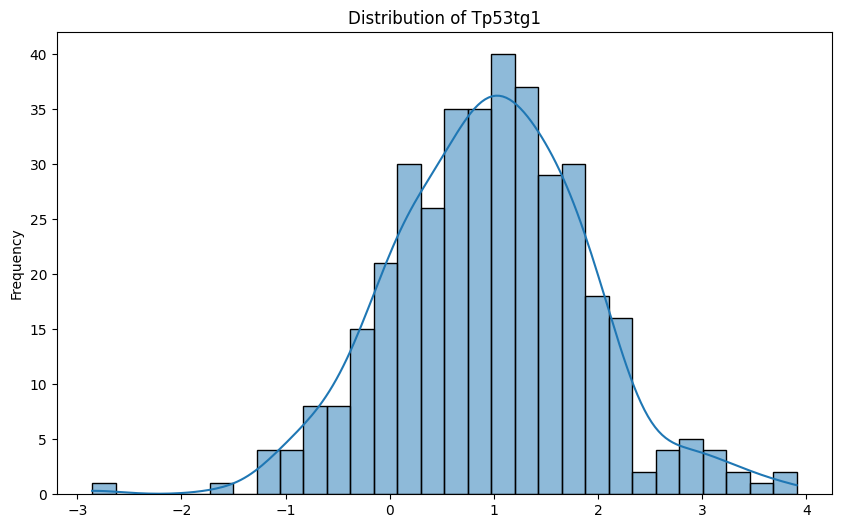

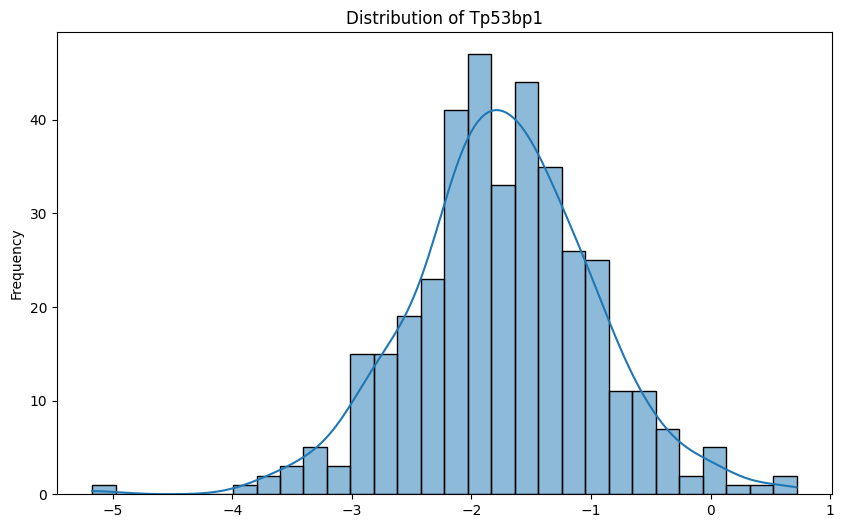

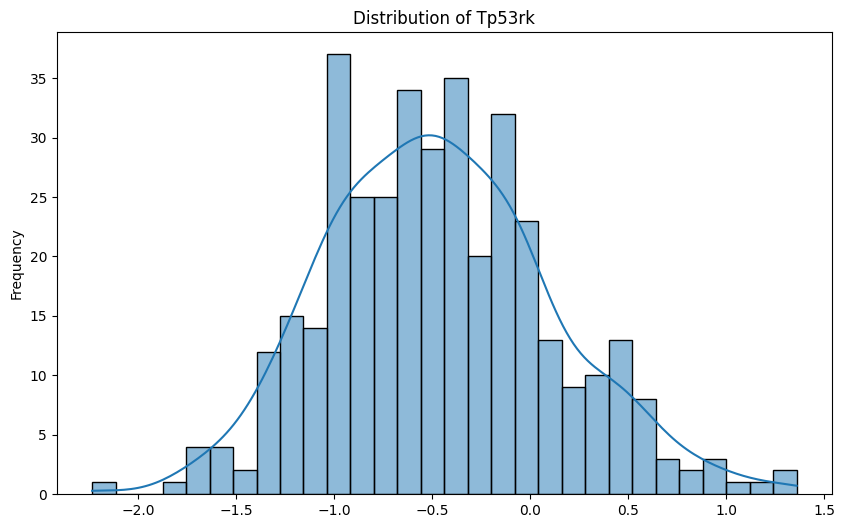

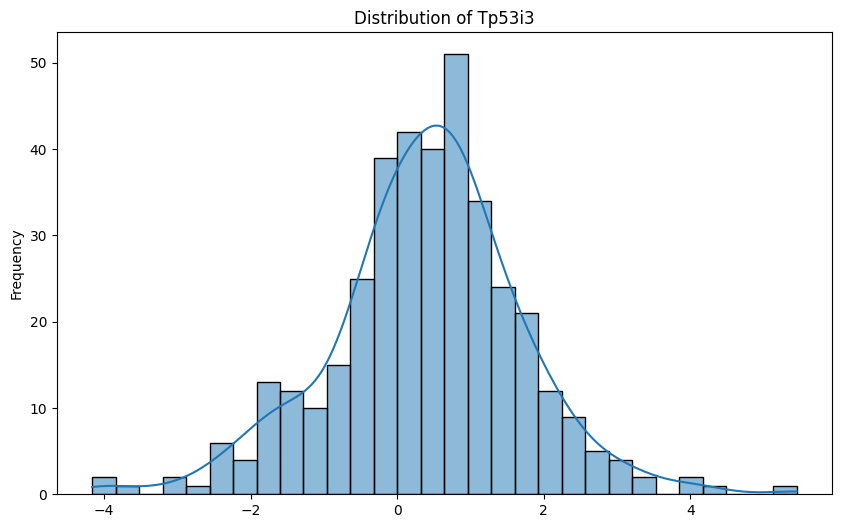

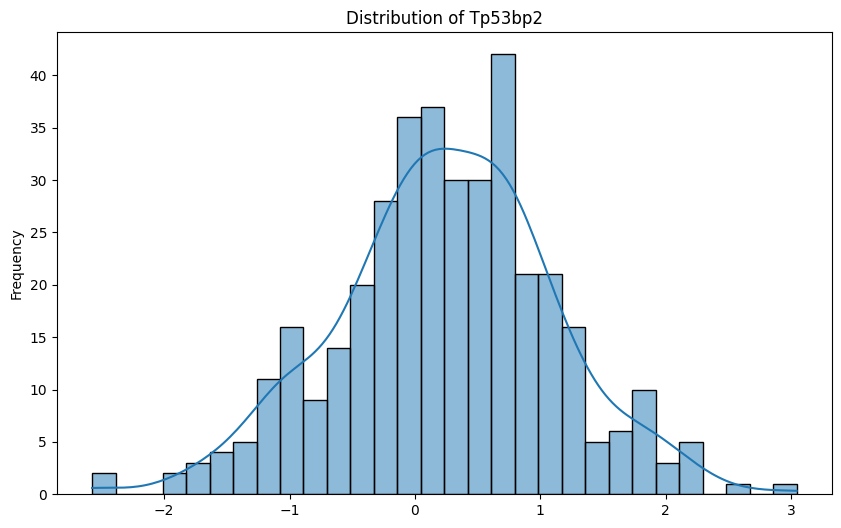

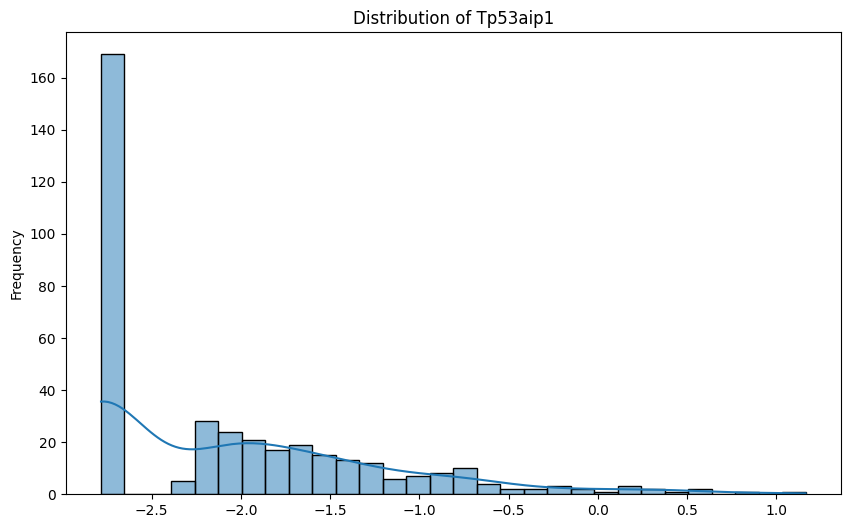

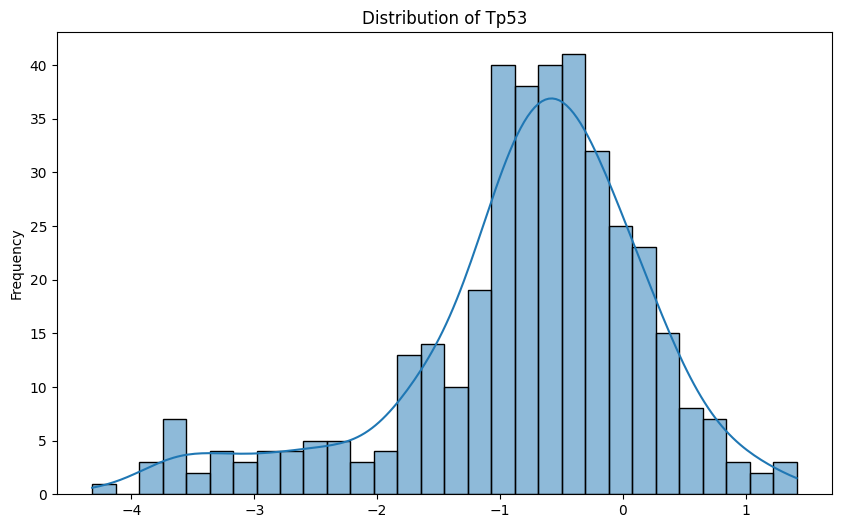

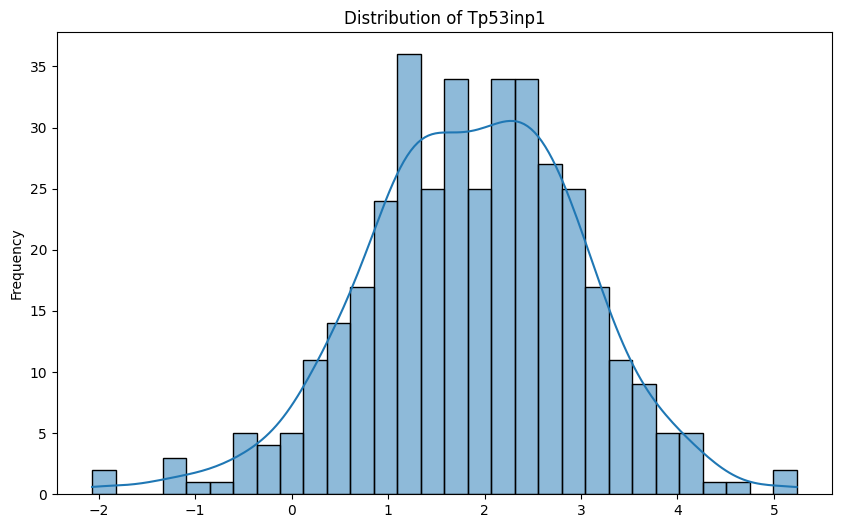

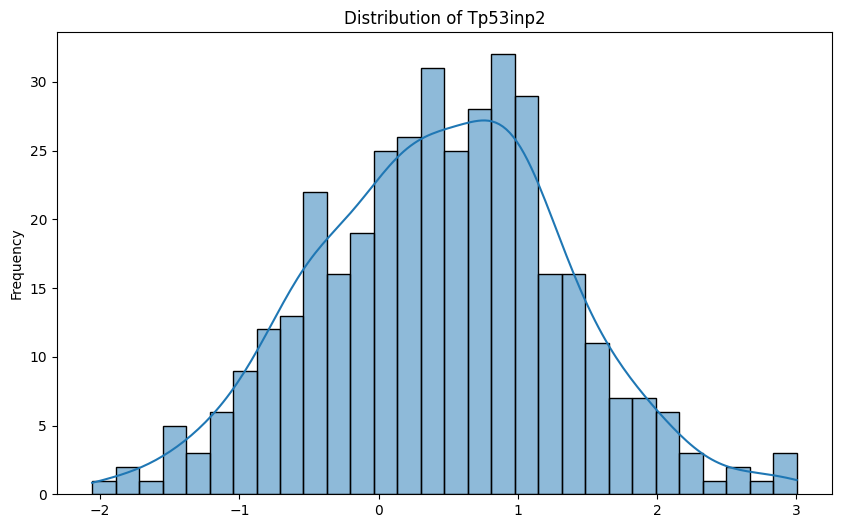

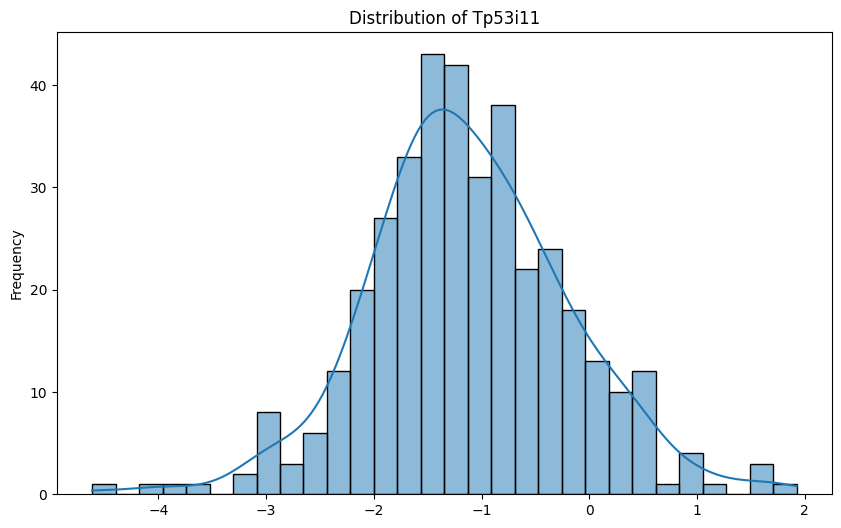

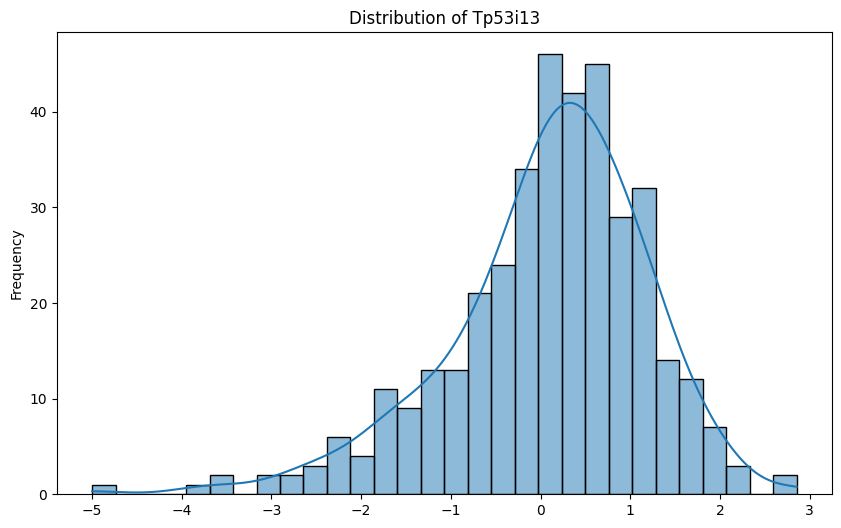

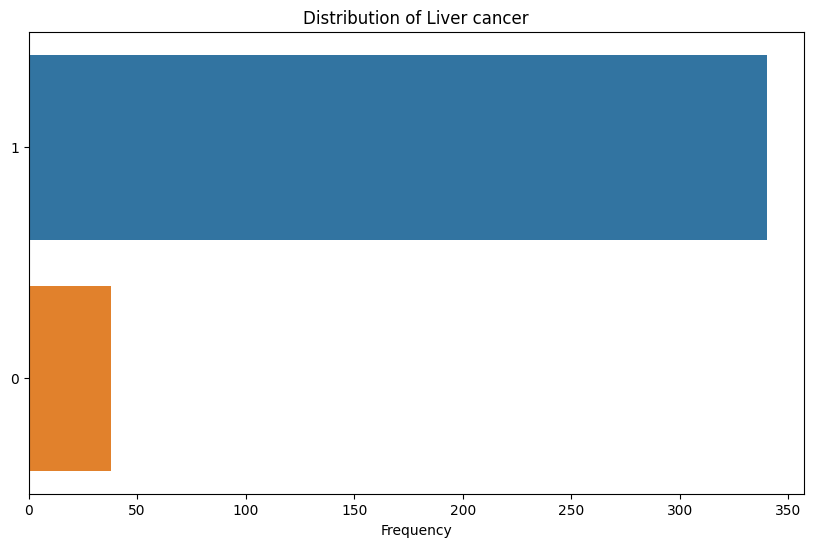

In [55]:
analyze_distributions(liver_merged_data, numerical_columns=[liver_condition_col, *liver_gene_list], categorical_columns=[liver_trait])

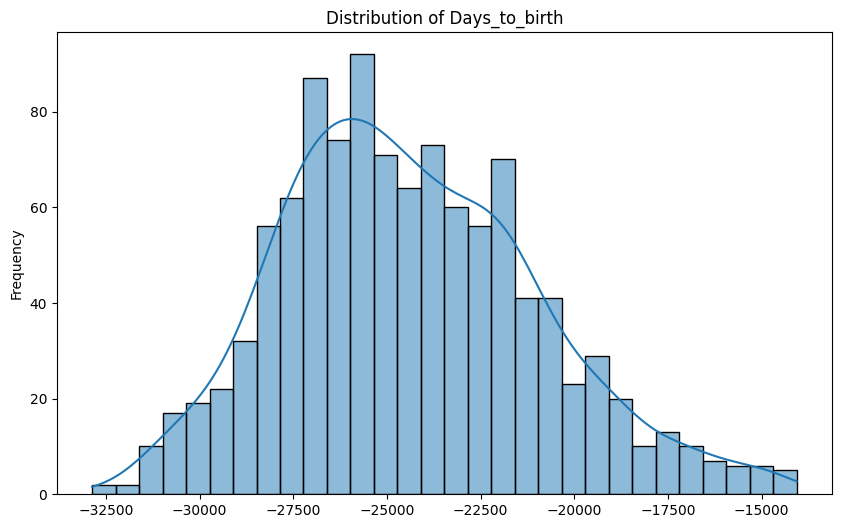

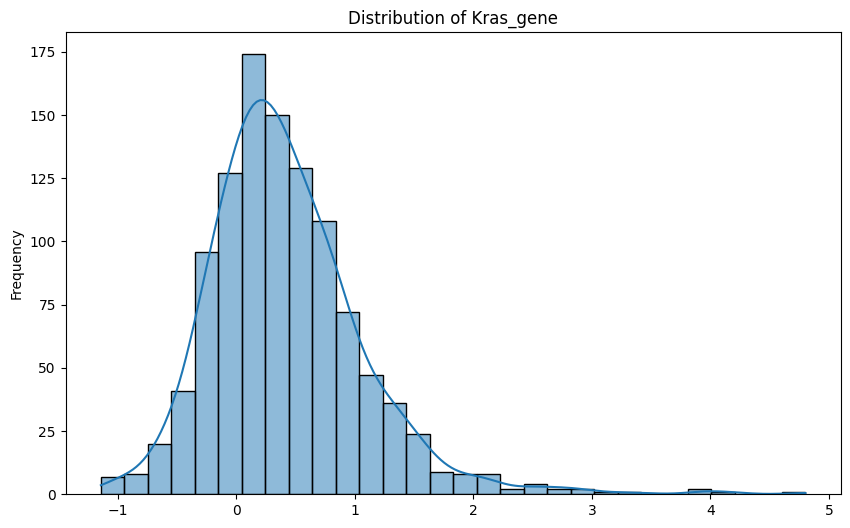

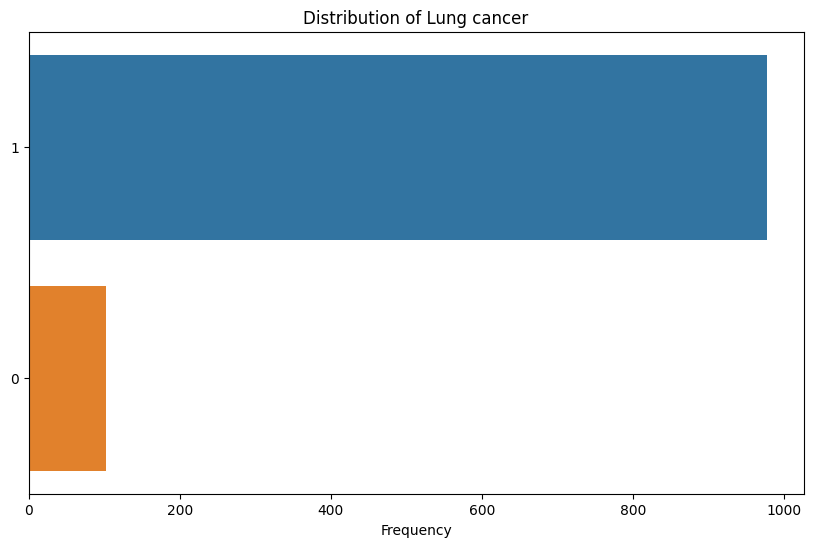

In [56]:
analyze_distributions(lung_merged_data, numerical_columns=[lung_condition_col, *lung_gene_list], categorical_columns=[lung_trait])

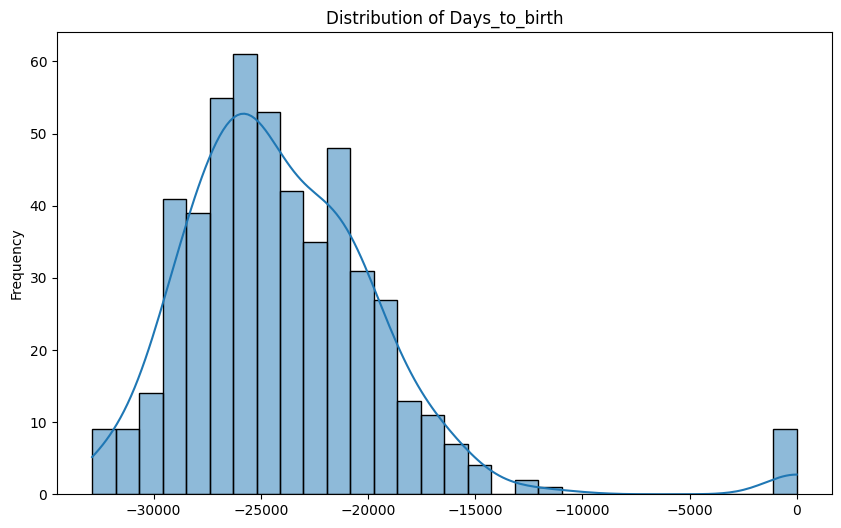

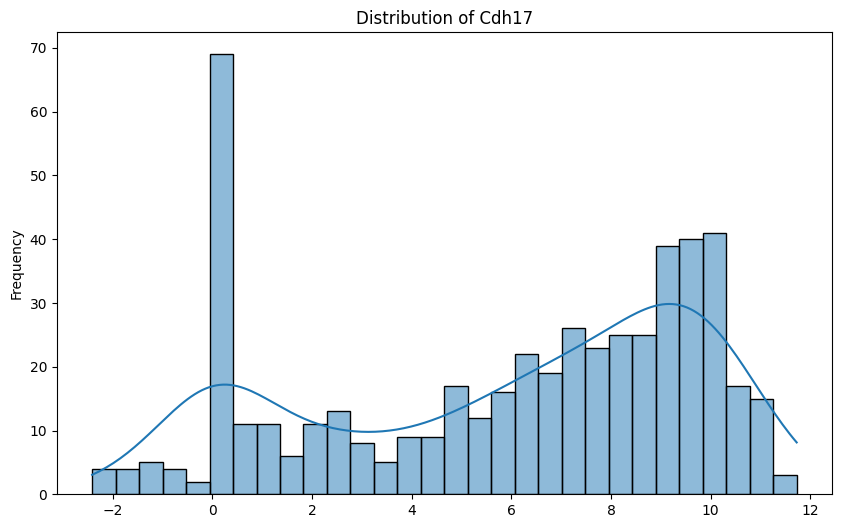

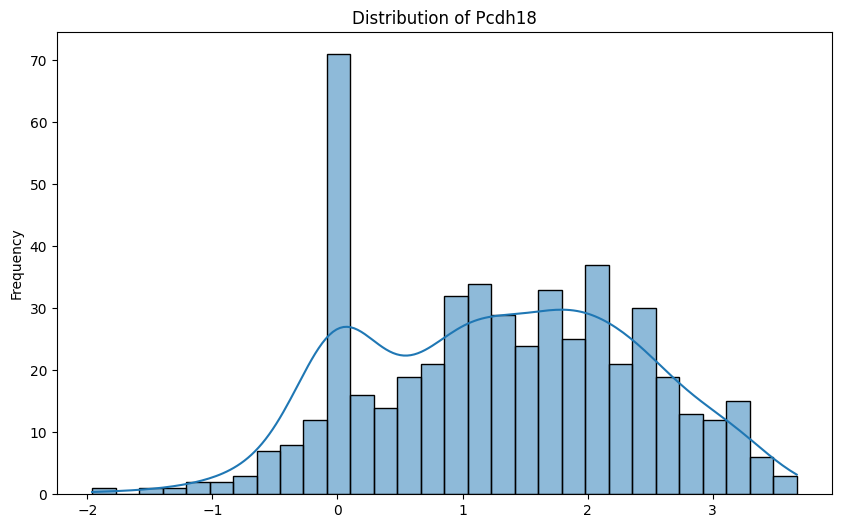

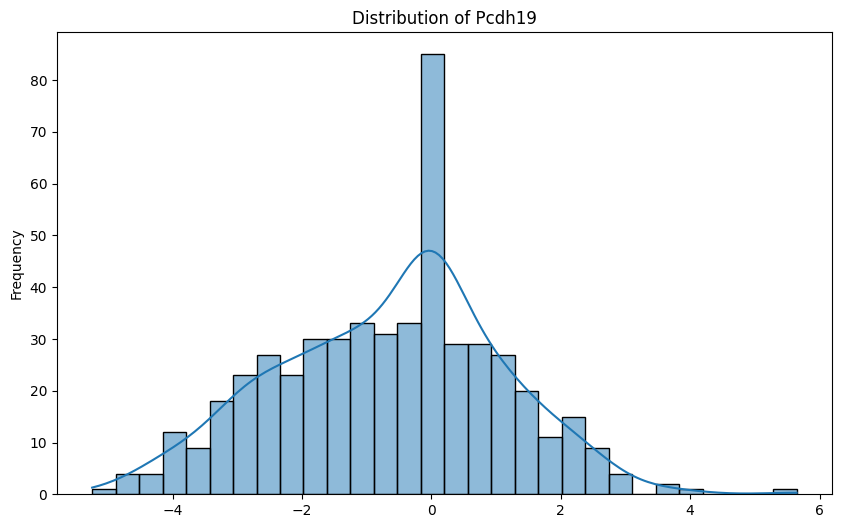

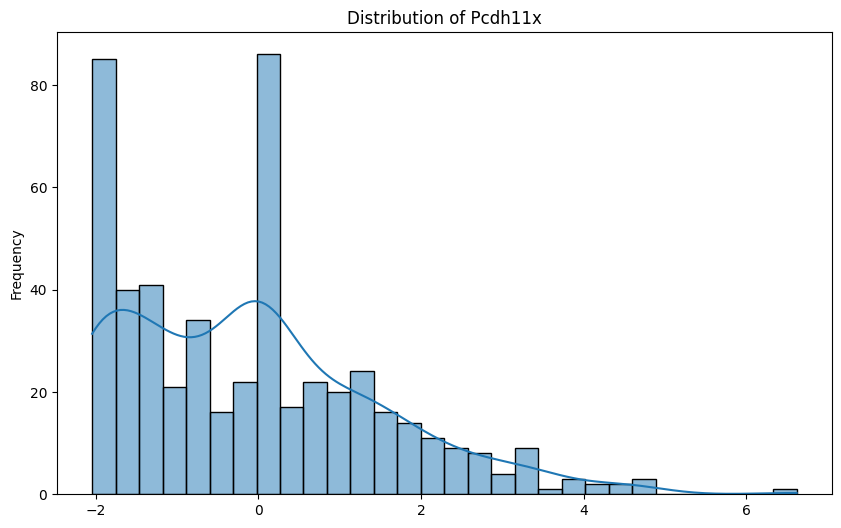

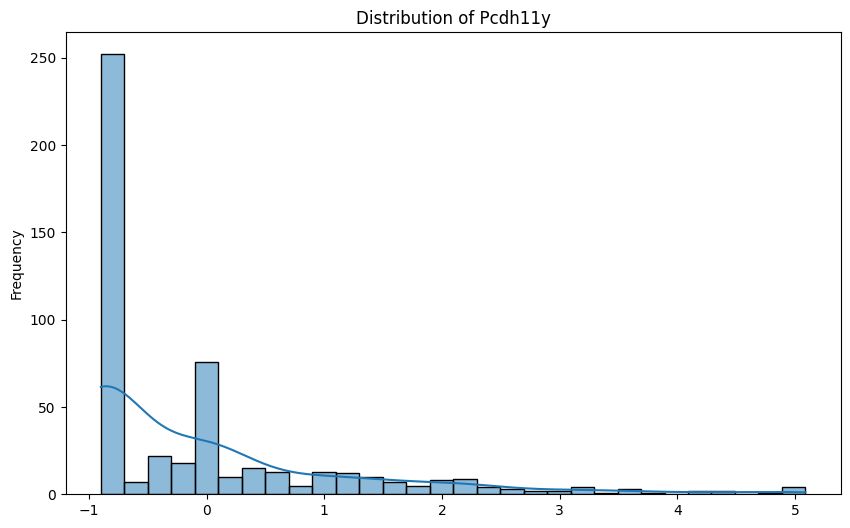

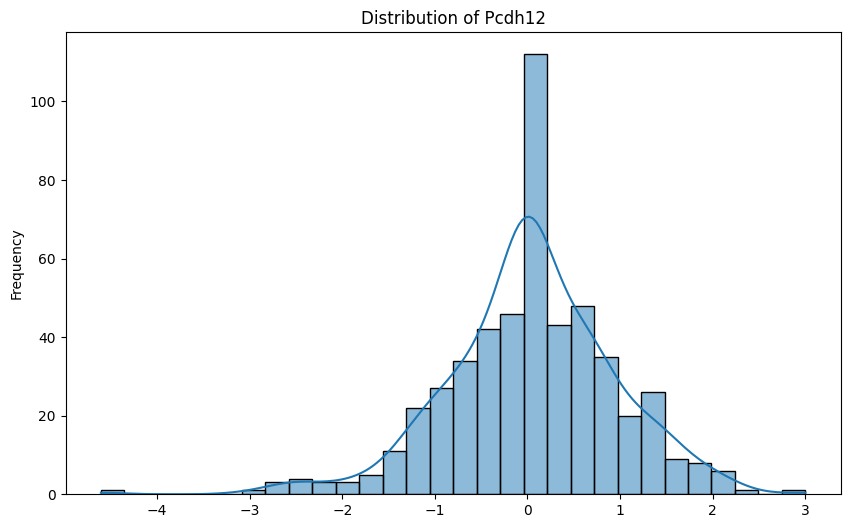

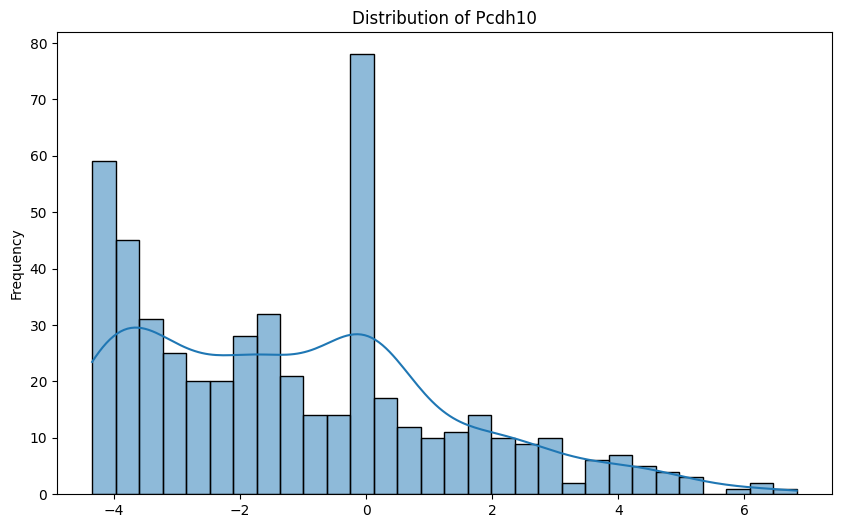

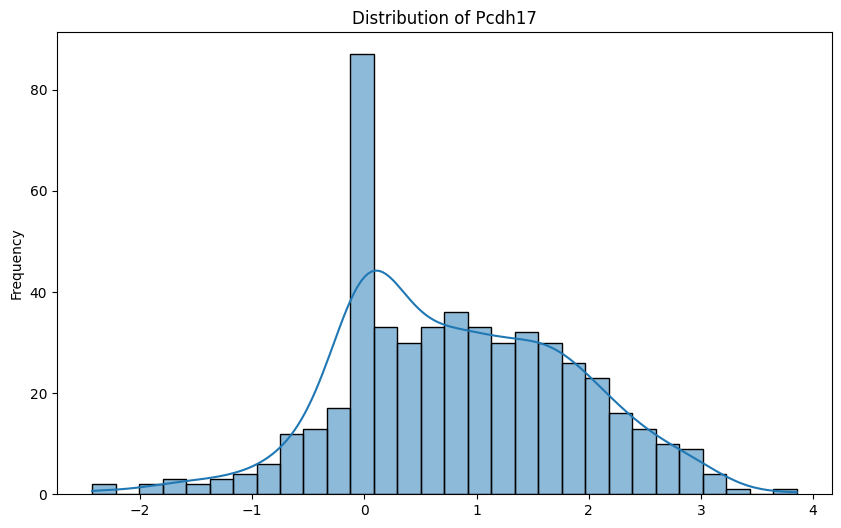

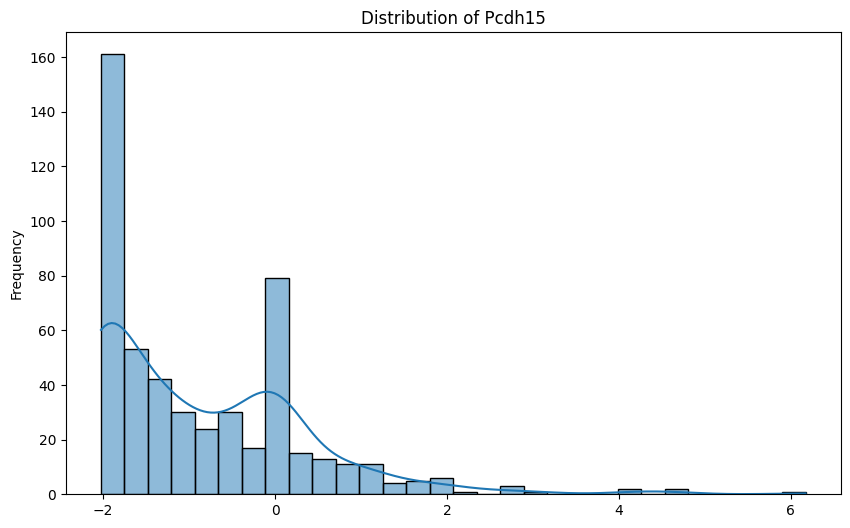

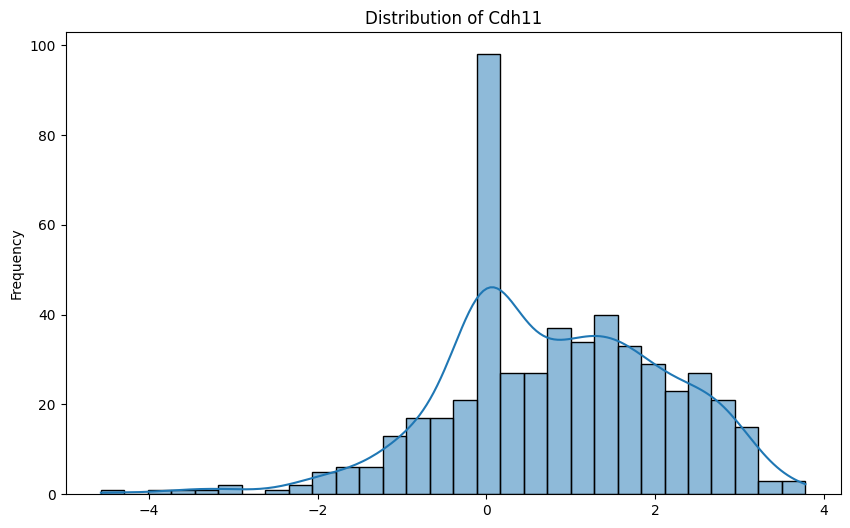

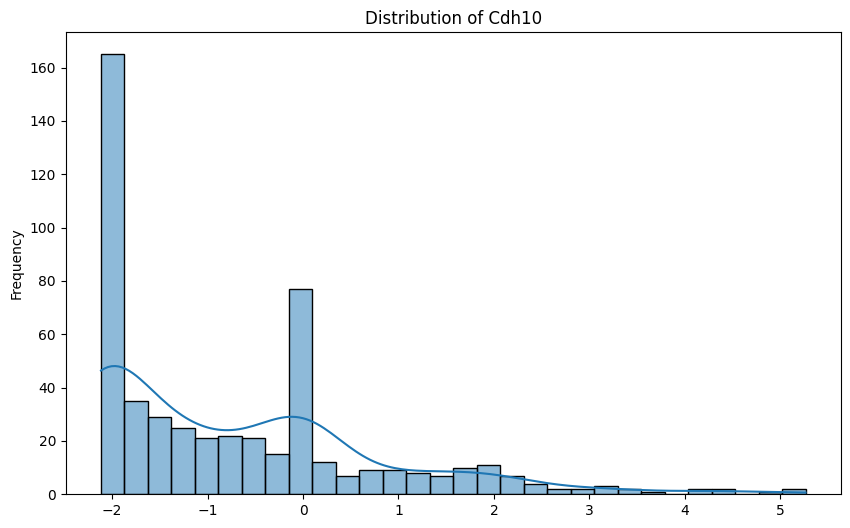

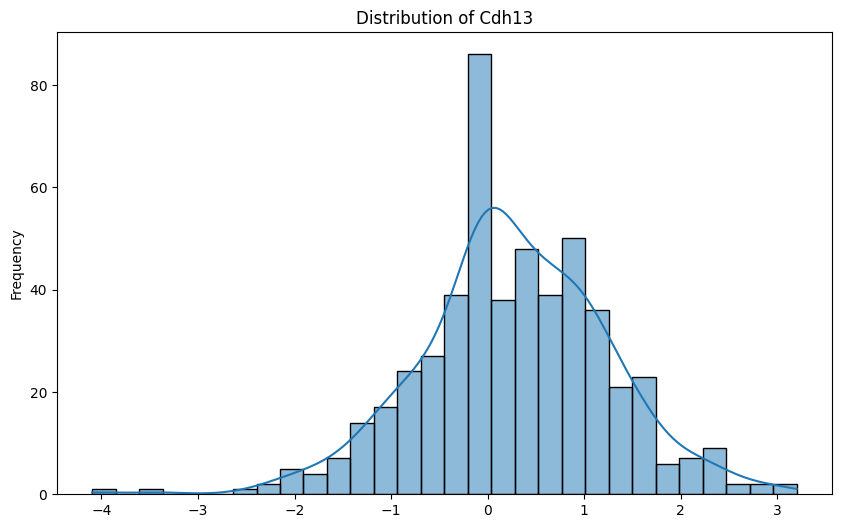

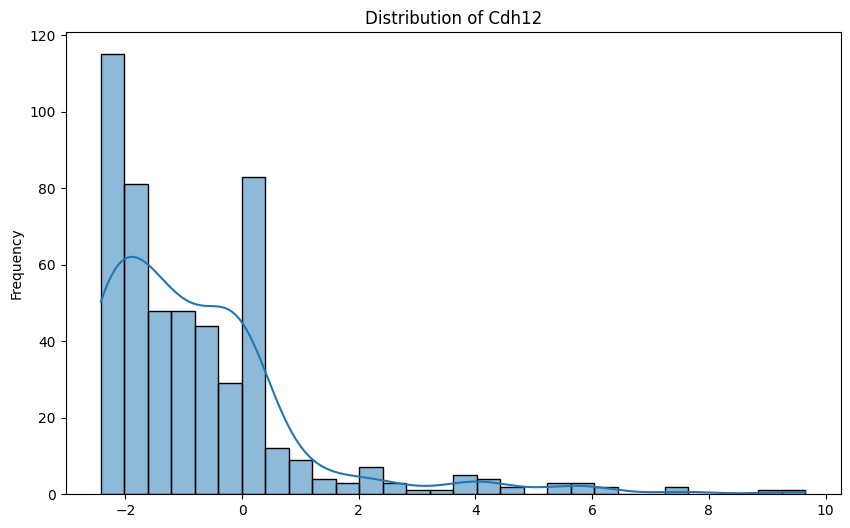

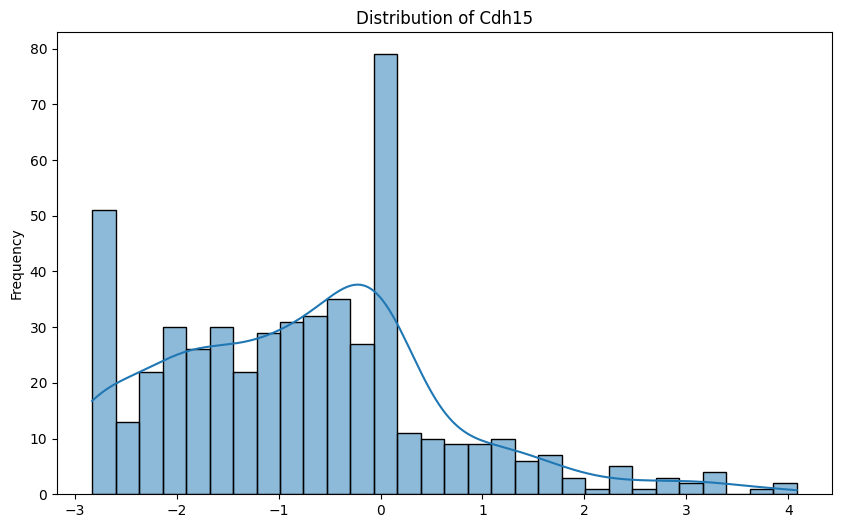

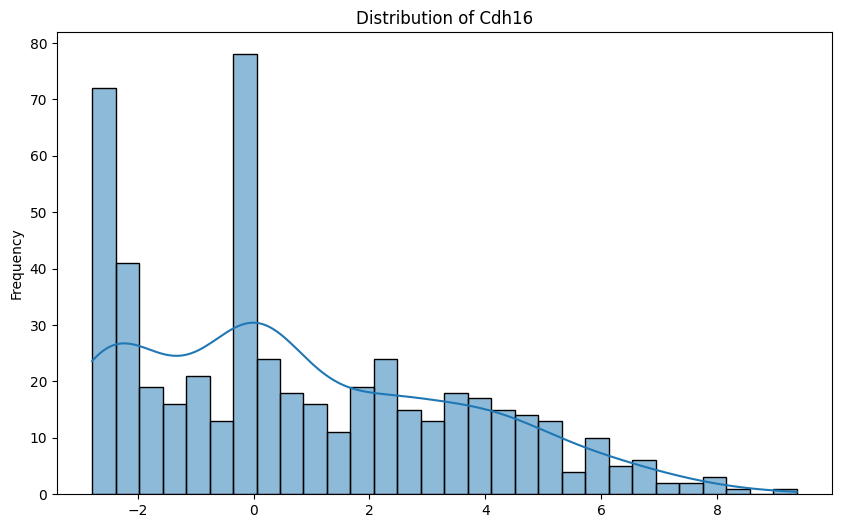

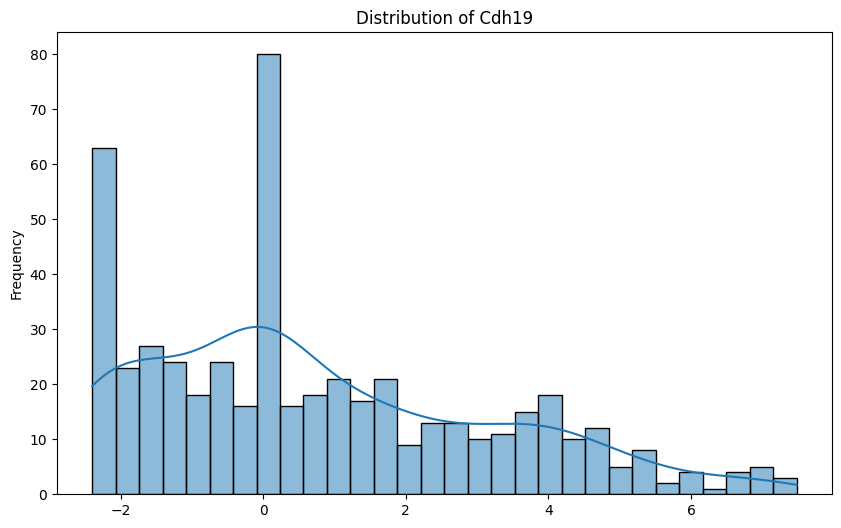

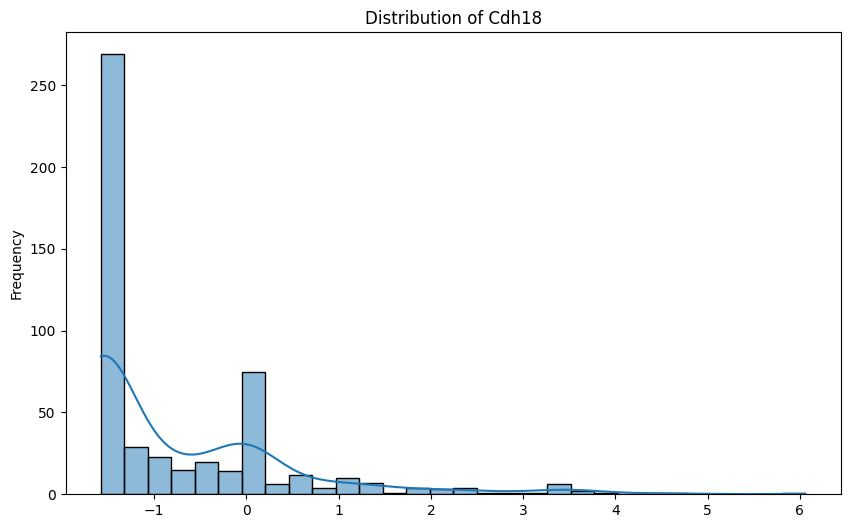

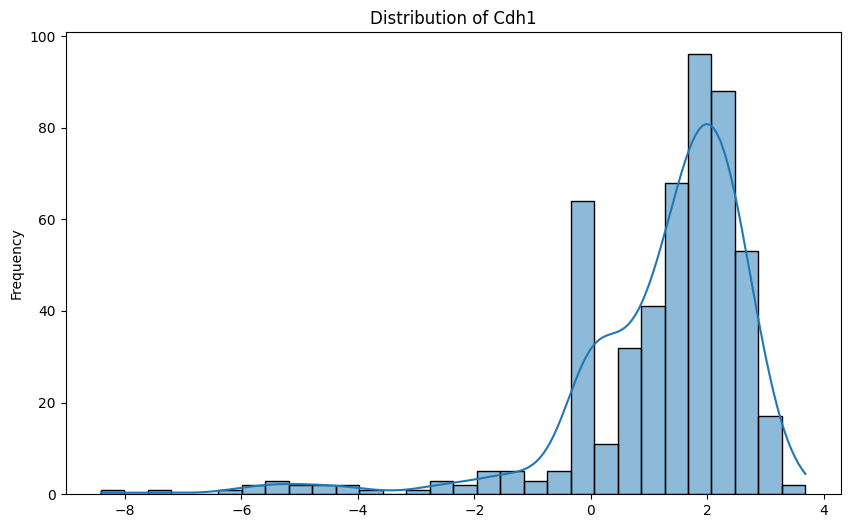

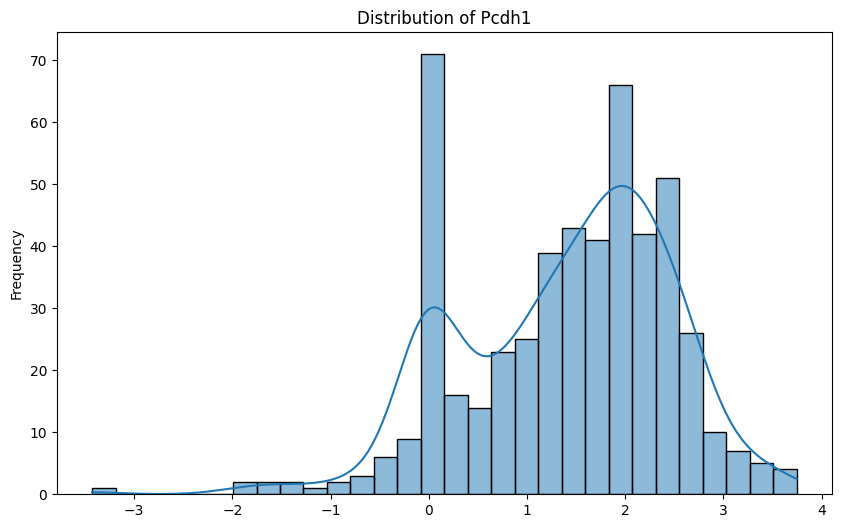

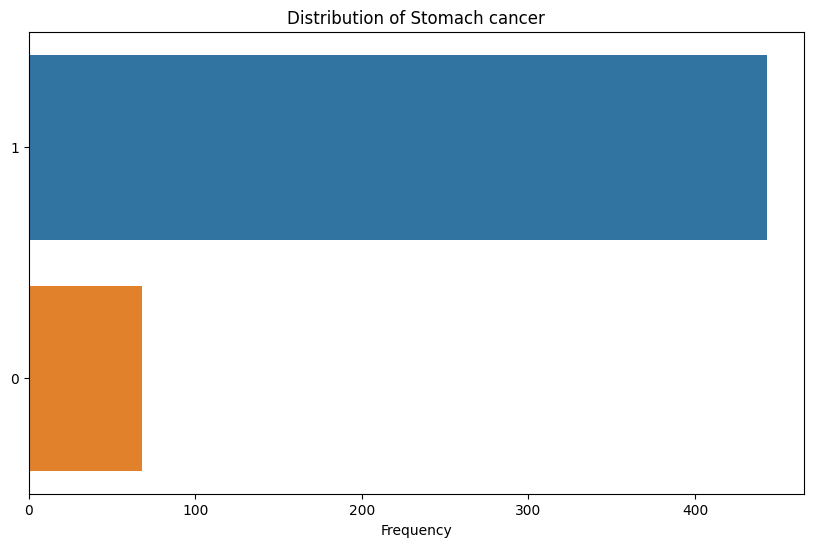

In [57]:
analyze_distributions(stomach_merged_data, numerical_columns=[stomach_condition_col, *stomach_gene_list], categorical_columns=[stomach_trait])

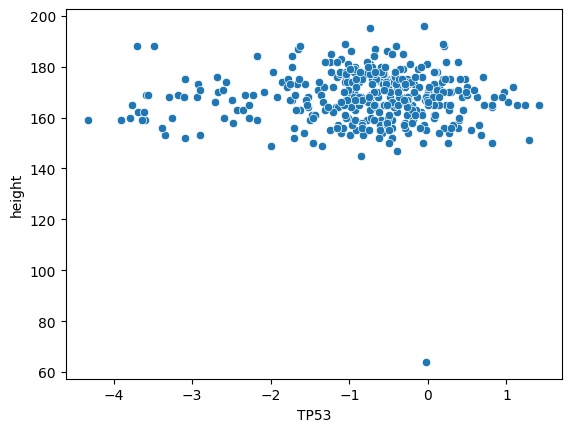

In [58]:
sns.scatterplot(data=liver_merged_data, x="TP53", y=liver_condition_col)
plt.show()

In [66]:
lung_merged_data[lung_condition_col] = (- lung_merged_data[lung_condition_col] / 365.25).astype(int)
lung_merged_data = lung_merged_data.rename(columns={lung_condition_col: lung_condition})
lung_input_cols = lung_merged_data.columns.tolist()

lung_merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Lung Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,70,-0.056592,2.128674,-0.531035,-0.185972,-0.190878,-0.11891,-0.659794,-1.204246,0.008601,...,-1.155117,0.528367,2.75061,0.428423,-0.639586,-0.195527,-0.324695,0.193167,-0.572812,1
TCGA-05-4249-01,67,-0.569692,-0.318126,-0.531035,0.237428,0.011822,-0.00611,1.018406,0.313854,-0.423399,...,-0.393117,1.632467,2.33551,-0.145577,-0.997486,-0.276027,-1.219395,1.850967,-0.471212,1
TCGA-05-4250-01,79,-0.899992,-0.918126,-0.531035,-0.621472,-0.454178,0.58719,-0.198894,-1.153846,-0.423399,...,-1.173917,1.966367,-1.28139,-0.374877,0.959514,0.714373,0.112305,-0.532833,-0.003812,1
TCGA-05-4382-01,68,0.667508,3.895974,-0.221535,-0.367272,0.131822,0.97629,-0.494994,1.059554,0.357201,...,-1.587117,0.359267,2.59051,0.806623,0.812114,0.367373,-0.494595,-1.062233,0.108588,1
TCGA-05-4384-01,66,-0.316892,2.380374,0.156865,0.232828,0.054822,0.27059,0.128606,0.440354,-0.423399,...,-0.435417,1.111467,-1.28139,-0.128477,0.110214,1.469373,0.194605,1.404667,-0.290712,1


In [67]:
stomach_merged_data[stomach_condition_col] = (- stomach_merged_data[stomach_condition_col] / 365.25).astype(int)
stomach_merged_data = stomach_merged_data.rename(columns={stomach_condition_col: stomach_condition})
stomach_input_cols = stomach_merged_data.columns.tolist()

stomach_merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Stomach Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,0,2.168708,-0.956226,-0.531035,0.135928,0.349322,0.14139,-0.419494,0.617054,2.509401,...,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512,1
TCGA-3M-AB47-01,0,1.309708,1.160674,-0.037135,0.210328,0.313322,-0.28301,-0.415794,1.218654,1.524101,...,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988,1
TCGA-B7-5816-01,51,-0.045892,-2.968626,-0.531035,-0.206872,-0.105678,0.15469,-0.937094,1.262254,-0.423399,...,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612,1
TCGA-B7-5818-01,62,0.076608,5.843574,-0.531035,-0.190272,-0.647478,-0.02321,-0.576694,-1.346446,-0.423399,...,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312,1
TCGA-B7-A5TI-01,52,0.046908,5.233774,-0.531035,-0.108772,-0.233578,0.21699,-1.040094,1.087354,-0.423399,...,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812,1
